In [1]:
import numpy as np
import pandas as pd

In [2]:
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = sns.load_dataset('iris')

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


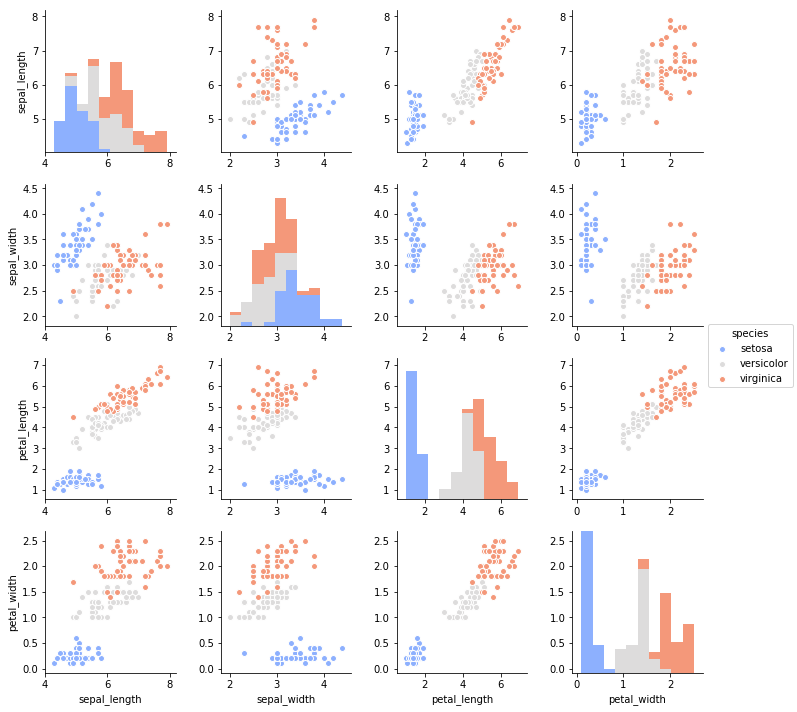

In [9]:
sns.pairplot(data = iris, hue = 'species', palette='coolwarm')

Split the dataset into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X = iris.drop('species', axis = 1)
y = iris['species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
svc_prediction = svc.predict(X_test)

In [31]:
svc.score(X_train, y_train)

0.99047619047619051

In [34]:
# grid search
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C':[0.001,0.01,0.1,1], 'gamma':[0.1,0.001,0.01,1]}

In [40]:
grid= GridSearchCV(estimator=svc, param_grid=param_grid, verbose=3)

In [41]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..... C=0.001, gamma=0.1, score=0.3611111111111111, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .... C=0.001, gamma=0.1, score=0.34285714285714286, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .... C=0.001, gamma=0.1, score=0.35294117647058826, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ... C=0.001, gamma=0.001, score=0.3611111111111111, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .. C=0.001, gamma=0.001, score=0.34285714285714286, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .. C=0.001, gamma=0.001, score=0.35294117647058826, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .... C=0.00

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.9411764705882353, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.1, 0.001, 0.01, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [42]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [43]:
grid.score(X_train,y_train)

0.98095238095238091

In [46]:
classifiers = [LogisticRegression(), SVC(C=1,gamma=0.1),RandomForestClassifier()]
names = ['Logisitic Regression', 'Support Vector Machine', 'Random forest']

In [47]:
z = zip(names, classifiers)

In [51]:
d = {}

In [ ]:
d.update()

In [56]:
def classifier(X_train, y_train,X_test,y_test, classifiers, names):
    Score = {}
    #from sklearn.model_selection import confusion_matrix, classification_matrix
    for name, classifier in zip(names, classifiers):
        classifier.fit(X_train, y_train)
        score = classifier.score(X_train, y_train)
        print('Score for '+ name + ' '+ str(score*100))
        Score[name] = score
        prediction = classifier.predict(X_test)
       

In [57]:
classifier(X_train=X_train, y_train=y_train , X_test= X_test, y_test=y_test,
          classifiers= classifiers,names= names)

Score for Logisitic Regression 93.3333333333
Score for Support Vector Machine 98.0952380952
Score for Random forest 99.0476190476
